/Users/pigeoneyevideography/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


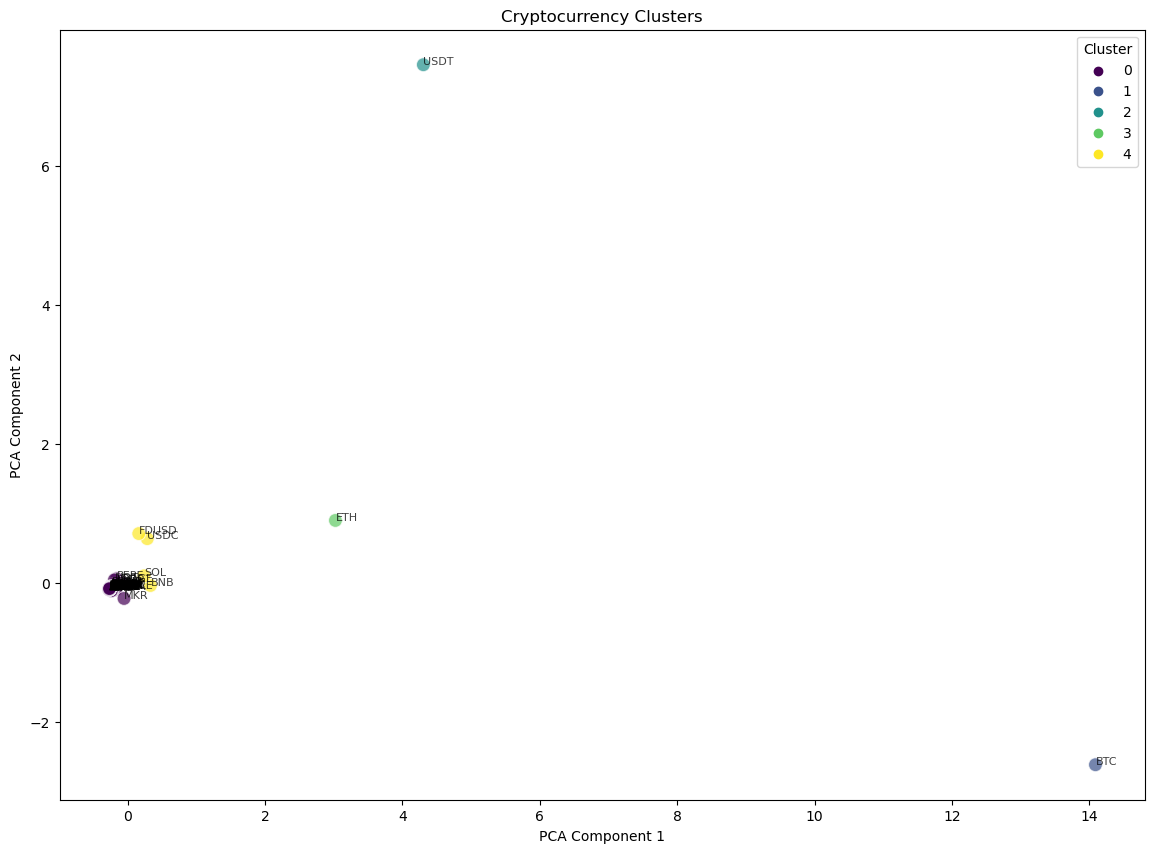

Cluster 1:
BTC
Cluster 3:
ETH
Cluster 2:
USDT
Cluster 4:
BNB, SOL, USDC, FDUSD
Cluster 0:
XRP, DOGE, TON, ADA, SHIB, AVAX, TRX, DOT, LINK, BCH, NEAR, MATIC, UNI, LTC, PEPE, LEO, DAI, ICP, KAS, ETC, APT, RNDR, STX, XMR, HBAR, FIL, ATOM, MNT, XLM, INJ, IMX, ARB, OKB, CRO, WIF, GRT, SUI, TAO, OP, AR, VET, MKR, FLOKI, BONK, THETA, FTM, ONDO, NOT, JASMY, LDO, RUNE, TIA, BGB, BRETT, PYTH, CORE, FET, SEI, STRK, ALGO, AAVE, JUP, FLR, FLOW, GALA, BEAM, ENA, ORDI, CHZ, QNT, DYDX, AXS, BSV, KCS, BTT, W, NEO, EGLD, RON, SAND, WLD, AKT, AGIX, GNO, ROSE, PENDLE, XTZ, LPT, XEC, MINA, GT, EOS, MANA

Cluster Characteristics:
         quote.USD.price  quote.USD.volume_24h  quote.USD.market_cap
cluster                                                             
0              47.573191          2.235721e+08          3.508548e+09
1           68531.816493          3.438515e+10          1.350854e+12
2               0.999649          6.799424e+10          1.124568e+11
3            3570.328160          1.729

In [1]:
import requests
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch data (reuse the code from the previous steps)
api_key = 'YOUR_API_KEY'
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {'start': '1', 'limit': '100', 'convert': 'USD'}
headers = {'Accepts': 'application/json', 'X-CMC_PRO_API_KEY': api_key}
response = requests.get(url, headers=headers, params=parameters)
data = response.json()
crypto_data = data['data']
df = pd.json_normalize(crypto_data)
features = df[['quote.USD.price', 'quote.USD.volume_24h', 'quote.USD.market_cap']]
features = features.fillna(features.mean())
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_features)
df['cluster'] = kmeans.labels_
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
df['pca_1'] = pca_features[:, 0]
df['pca_2'] = pca_features[:, 1]

# Plot the clusters
plt.figure(figsize=(14, 10))
sns.scatterplot(x='pca_1', y='pca_2', hue='cluster', palette='viridis', data=df, s=100, alpha=0.7)
plt.title('Cryptocurrency Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
for i in range(df.shape[0]):
    plt.annotate(df['symbol'][i], (df['pca_1'][i], df['pca_2'][i]), fontsize=8, alpha=0.75)
plt.show()

# Print the symbols of the cryptocurrencies in each cluster
for cluster in df['cluster'].unique():
    print(f"Cluster {cluster}:")
    cluster_symbols = df[df['cluster'] == cluster]['symbol'].tolist()
    print(", ".join(cluster_symbols))

# Analyze cluster characteristics
cluster_summary = df.groupby('cluster')[['quote.USD.price', 'quote.USD.volume_24h', 'quote.USD.market_cap']].mean()
print("\nCluster Characteristics:")
print(cluster_summary)